In [1]:
import pandas as pd

# Load datasets
machine1_data = pd.read_csv('machine1.csv')
machine2_data = pd.read_csv('machine2.csv')

C:\Users\Ravish\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
machine1_data.head()

,input_1,input_2,input_3,power,check
0,21.61,5.92,167.45,69.83,100
1,16.85,10.98,438.88,69.10,100
2,23.85,4.68,343.17,72.11,100
3,23.03,7.43,539.39,76.19,100
4,23.29,8.35,383.42,71.67,100


In [3]:
machine2_data.head()

,input_1,input_2,input_3,power,check
0,29,11,200,78.166434,100
1,29,11,400,88.237874,95
2,29,11,600,107.797314,91
3,29,11,800,136.844754,109
4,29,11,1000,175.380194,105


In [4]:
# Filter rows where 'check' value is in b/w 90 and 110 for both machines
machine1_data = machine1_data[(machine1_data['check'] >= 90) & (machine1_data['check'] <= 110)]
machine2_data = machine2_data[(machine2_data['check'] >= 90) & (machine2_data['check'] <= 110)]

In [5]:
# Devide the dataset into Dependent and Independent variable for Machine1
X_machine1 = machine1_data[['input_1', 'input_2', 'input_3']]
y_machine1 = machine1_data['power']

# Devide the dataset into Dependent and Independent variable for Machine 2
X_machine2 = machine2_data[['input_1', 'input_2', 'input_3']]
y_machine2 = machine2_data['power']

# Train Machine Learning Models

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_machine1, y_machine1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_machine2, y_machine2, test_size=0.2, random_state=42)

# Train model for Machine 1
model_machine1 = LinearRegression()
model_machine1.fit(X_train1, y_train1)

# Train model for Machine 2
model_machine2 = LinearRegression()
model_machine2.fit(X_train2, y_train2)

LinearRegression()

# Evaluate the Models

In [7]:
# Make predictions and calculate MSE for Machine 1
y_pred1 = model_machine1.predict(X_test1)
mse_machine1 = mean_squared_error(y_test1, y_pred1)

# Make predictions and calculate MSE for Machine 2
y_pred2 = model_machine2.predict(X_test2)
mse_machine2 = mean_squared_error(y_test2, y_pred2)

print(f'Mean Squared Error for Machine 1: {mse_machine1}')
print(f'Mean Squared Error for Machine 2: {mse_machine2}')

Mean Squared Error for Machine 1: 11.583447836264506
Mean Squared Error for Machine 2: 96.94392839194433


# Visualize the Results

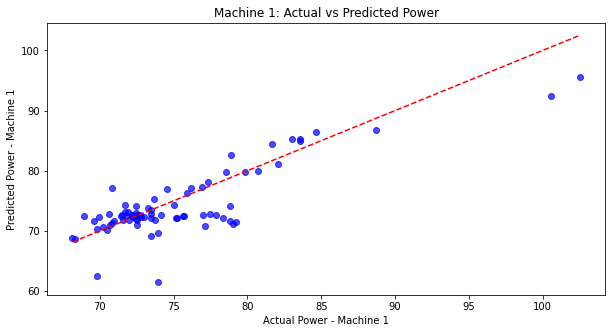

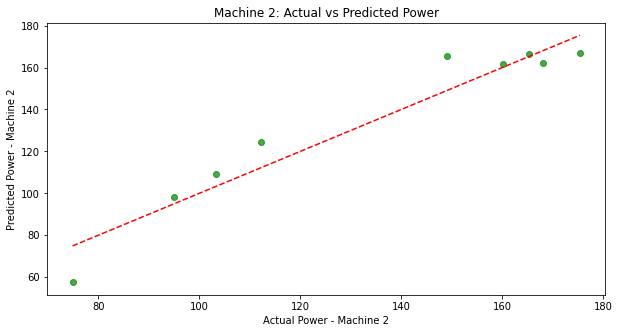

In [8]:
import matplotlib.pyplot as plt
# Plot graph b/w pred's vs. actual for Machine 1
plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred1, alpha=0.7, color='blue')
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], '--', color='red')
plt.xlabel('Actual Power - Machine 1')
plt.ylabel('Predicted Power - Machine 1')
plt.title('Machine 1: Actual vs Predicted Power')
plt.show()

# Plot grapg b/w pred's vs. actual for Machine 2
plt.figure(figsize=(10, 5))
plt.scatter(y_test2, y_pred2, alpha=0.7, color='green')
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], '--', color='red')
plt.xlabel('Actual Power - Machine 2')
plt.ylabel('Predicted Power - Machine 2')
plt.title('Machine 2: Actual vs Predicted Power')
plt.show()

# Step 2: Define the Problem

### Explanation: 
- There are 20 machines in total: 10 of Machine Type 1 and 10 of Machine Type 2.
    
- Each machine's power usage is modeled as a function of its GPH (which is Input 3).
    
- The target is to achieve a total of 9,000 GPH across all 20 machines while minimizing the total power consumption.
    
### Constraints:
   - Machine Type 1: GPH range between 180 and 600.
        
   - Machine Type 2: GPH range between 300 and 1,000.
      
   - Total GPH = 9,000.

# Formulate the Optimization Model

In [9]:
from scipy.optimize import minimize
import numpy as np

# Define the static inputs
input1 = 25
input2 = 6

# Define the power usage function for each machine type based on the models
def power_machine1(gph):
    print(model_machine1.predict([[input1, input2, gph]])[0])
    # Predict power usage for Machine 1 model with input1 and input2 fixed
    return model_machine1.predict([[input1, input2, gph]])[0]

def power_machine2(gph):
    # Predict power usage for Machine 2 model with input1 and input2 fixed
    return model_machine2.predict([[input1, input2, gph]])[0]

# Define the objective function to minimize (total power of all machines)
def total_power(gph_values):
    # gph_values[:10] corresponds to the 10 Machine Type 1 GPH values
    # gph_values[10:] corresponds to the 10 Machine Type 2 GPH values
    power1 = sum(power_machine1(gph) for gph in gph_values[:10])
    power2 = sum(power_machine2(gph) for gph in gph_values[10:])
    return power1 + power2

# Define Constraints

Explanation:

    Total GPH constraint: The sum of all GPH values should be 9,000.
    
    GPH range constraints: Each machine has a specific GPH range (180-600 for Machine Type 1 and 300-1000 for Machine Type 2).

In [10]:
# Total GPH constraint function
def gph_constraint(gph_values):
    return sum(gph_values) - 9000  # The sum should equal 9000

# Define the bounds for each machine's GPH
bounds = [(180, 600)] * 10 + [(300, 1000)] * 10  # 10 machines of each type

# Define the constraint in the format required by scipy
constraints = {'type': 'eq', 'fun': gph_constraint}

# Optimize GPH for Minimum Power

Explanation: We use the minimize function from scipy.optimize with the objective function and constraints.

In [11]:
# Initial guess for GPH values (set to the middle of each machine's range)
initial_gph = [390] * 10 + [650] * 10  # 390 is the middle of (180, 600) and 650 is the middle of (300, 1000)

# Perform the optimization
result = minimize(
    total_power,
    initial_gph,
    method='SLSQP',  # Sequential Least Squares Programming (good for bounded optimization)
    bounds=bounds,
    constraints=constraints
)

C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does 

73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408405567
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408405567
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408405567
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408405567
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408351125
73.99621408405567
73.9962140

C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does 

71.44043712410317
71.44043712410317
71.44043768159426
71.44043768159425
71.44043768159426
71.44043712410317
71.44043712410317
71.44043712410317
71.44043712410317
71.4404371246476
71.44043712410317
71.44043712410317
71.44043768159426
71.44043768159425
71.44043768159426
71.44043712410317
71.44043712410317
71.44043712410317
71.44043712410317
71.44043712410317
71.44043712464759
71.44043712410317
71.44043768159426
71.44043768159425
71.44043768159426
71.44043712410317
71.44043712410317
71.44043712410317
71.44043712410317
71.44043712410317
71.44043712410317
71.4404371246476
71.44043768159426
71.44043768159425
71.44043768159426
71.44043712410317
71.44043712410317
71.44043712410317
71.44043712410317
71.44043712410317
71.44043712410317
71.44043712410317
71.44043768213868
71.44043768159425
71.44043768159426
71.44043712410317
71.44043712410317
71.44043712410317
71.44043712410317
71.44043712410317
71.44043712410317
71.44043712410317
71.44043768159426
71.44043768213868
71.44043768159426
71.440437124

C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does 

71.44216177967682
71.44216177913239
71.44216177913239
71.44216233662347
71.44216233662347
71.44216233662347
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177967681
71.44216177913239
71.44216233662347
71.44216233662347
71.44216233662347
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177967682
71.44216233662347
71.44216233662347
71.44216233662347
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.4421623371679
71.44216233662347
71.44216233662347
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216233662347
71.4421623371679
71.44216233662347
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216233662347
71.44216233662347
71.442162337

C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does 

71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216233662347
71.44216233662347
71.44216233662347
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216233662347
71.44216233662347
71.44216233662347
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216233662347
71.44216233662347
71.44216233662347
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216177913239
71.44216233662347
71.44216233662347
71.44216233662347
71.45078477726281
71.45078477726281
71.45078477726281
71.45078477726281
71.45078477726281
71.45078477726281
71.45078477726281
71.45078533475389
71.45078533475389
71.45078533475389
71.45078477780723
71.45078477726281
71.45078477726281
71.45078477726281
71.45078477726281
71.45078477726281
71.45078477726281
71.4507853

C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does 

71.49389976791487
71.49389976791488
71.49389976791488
71.49389976791487
71.49389976791488
71.49390032540595
71.49390032540595
71.49390032540595
71.49389976791487
71.4938997684593
71.49389976791487
71.49389976791488
71.49389976791488
71.49389976791487
71.49389976791488
71.49390032540595
71.49390032540595
71.49390032540595
71.49389976791487
71.49389976791488
71.4938997684593
71.49389976791488
71.49389976791488
71.49389976791487
71.49389976791488
71.49390032540595
71.49390032540595
71.49390032540595
71.49389976791487
71.49389976791488
71.49389976791487
71.4938997684593
71.49389976791488
71.49389976791487
71.49389976791488
71.49390032540595
71.49390032540595
71.49390032540595
71.49389976791487
71.49389976791488
71.49389976791487
71.49389976791488
71.4938997684593
71.49389976791487
71.49389976791488
71.49390032540595
71.49390032540595
71.49390032540595
71.49389976791487
71.49389976791488
71.49389976791487
71.49389976791488
71.49389976791488
71.4938997684593
71.49389976791488
71.493900325405

C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does 

71.70948405975138
71.70948684720678
71.70948406029581
71.70948405975139
71.70948405975139
71.70948405975138
71.70948405975139
71.70948740469785
71.70948740469785
71.70948740469785
71.70948405975138
71.70948684720678
71.70948405975138
71.70948406029581
71.70948405975139
71.70948405975138
71.70948405975139
71.70948740469785
71.70948740469785
71.70948740469785
71.70948405975138
71.70948684720678
71.70948405975138
71.70948405975139
71.70948406029581
71.70948405975138
71.70948405975139
71.70948740469785
71.70948740469785
71.70948740469785
71.70948405975138
71.70948684720678
71.70948405975138
71.70948405975139
71.70948405975139
71.70948406029581
71.70948405975139
71.70948740469785
71.70948740469785
71.70948740469785
71.70948405975138
71.70948684720678
71.70948405975138
71.70948405975139
71.70948405975139
71.70948405975138
71.70948406029581
71.70948740469785
71.70948740469785
71.70948740469785
71.70948405975138
71.70948684720678
71.70948405975138
71.70948405975139
71.70948405975139
71.7094840

C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does 

72.7874229411887
72.7874368786459
72.7874229411887
72.7874257286441
72.78742572918851
72.78742572864408
72.7874257286441
72.78743743613697
72.78743743613695
72.78743743613697
72.7874229411887
72.7874368786459
72.7874229411887
72.7874257286441
72.7874257286441
72.78742572918851
72.7874257286441
72.78743743613697
72.78743743613695
72.78743743613697
72.7874229411887
72.7874368786459
72.7874229411887
72.7874257286441
72.7874257286441
72.78742572864408
72.78742572918853
72.78743743613697
72.78743743613695
72.78743743613697
72.7874229411887
72.7874368786459
72.7874229411887
72.7874257286441
72.7874257286441
72.78742572864408
72.7874257286441
72.78743743668139
72.78743743613695
72.78743743613697
72.7874229411887
72.7874368786459
72.7874229411887
72.7874257286441
72.7874257286441
72.78742572864408
72.7874257286441
72.78743743613697
72.78743743668139
72.78743743613697
72.7874229411887
72.7874368786459
72.7874229411887
72.7874257286441
72.7874257286441
72.78742572864408
72.7874257286441
72.78743

C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does 

72.7874229411887
72.7874368786459
72.7874229411887
72.7874257286441
72.7874257286441
72.78742572864408
72.7874257286441
72.78743743613697
72.78743743613695
72.78743743613697
72.7874229411887
72.7874368786459
72.7874229411887
72.7874257286441
72.7874257286441
72.78742572864408
72.7874257286441
72.78743743613697
72.78743743613695
72.78743743613697
72.7874229411887
72.7874368786459
72.7874229411887
72.7874257286441
72.7874257286441
72.78742572864408
72.7874257286441
72.78743743613697
72.78743743613695
72.78743743613697
72.7874229411887
72.7874368786459
72.7874229411887
72.7874257286441
72.7874257286441
72.78742572864408
72.7874257286441
72.78743743613697
72.78743743613695
72.78743743613697
72.7874229411887
72.7874368786459
72.7874229411887
72.7874257286441
72.7874257286441
72.78742572864408
72.7874257286441
72.78743743613697
72.78743743613695
72.78743743613697
72.7874229411887
72.7874368786459
72.7874229411887
72.7874257286441
72.7874257286441
72.78742572864408
72.7874257286441
72.7874374

C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does 

78.17640333908624
78.17640333908624
78.17633588969362
78.17640556905062
78.1763358896936
78.17634982534877
78.17634982534875
78.17634703789336
78.17634703789336
78.17640333908622
78.17640333908624
78.17640333908624
78.17633588969362
78.17640556905062
78.1763358896936
78.17634982534877
78.17634982534875
78.17634703789336
78.17634703789336
78.17640333908622
78.17640333908624
78.17640333908624
78.17633588969362
78.17640556905062
78.1763358896936
78.17634982534877
78.17634982534875
78.17634703789336
78.17634703789336
78.17640333908622
78.17640333908624
78.17640333908624
78.17633588969362
78.17640556905062
78.1763358896936
78.17634982534877
78.17634982534875
78.17634703789336
78.17634703789336
78.17640333908622
78.17640333908624
78.17640333908624
78.17633588969362
78.17640556905062
78.1763358896936
78.17634982534877
78.17634982534875
78.17634703789336
78.17634703789336
78.17640333908622
78.17640333908624
78.17640333908624
78.17633588969362
78.17640556905062
78.1763358896936
78.1763498253487

C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does 

81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850627601
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850627601
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850627601
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850627601
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850627601
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.6687185

C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does 

In [12]:
# Check if the optimization was successful
if result.success:
    optimal_gph = result.x  # Optimized GPH values for all 20 machines
    total_optimal_power = total_power(optimal_gph)

    print("Optimization Successful!")
    print("Optimal GPH values for Machine Type 1:", optimal_gph[:10])
    print("Optimal GPH values for Machine Type 2:", optimal_gph[10:])
    print(f"Total Optimal Power Consumption: {total_optimal_power:.2f} units")
else:
    print("Optimization Failed:", result.message)

81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
81.66871850682043
Optimization Successful!
Optimal GPH values for Machine Type 1: [600. 600. 600. 600. 600. 600. 600. 600. 600. 600.]
Optimal GPH values for Machine Type 2: [300. 300. 300. 300. 300. 300. 300. 300. 300. 300.]
Total Optimal Power Consumption: 1521.94 units


C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Ravish\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does 

# Interpret the Results
Explanation:
    Optimal GPH values: These values represent the ideal production rate for each machine while keeping the total power consumption as low as possible.
    
    Total Optimal Power: This is the total power consumption when all 20 machines are producing at their optimal GPH.
    The optimization considers the constraints to ensure that the total GPH equals 9,000.

### Methodology:
1. The power usage models from Step 1 were used to predict power based on the GPH of each machine.
2. The objective was to minimize total power consumption while meeting the total GPH requirement of 9,000.
3. The optimization used Sequential Least Squares Programming (SLSQP) with constraints.
4. The final result gives the GPH value for each machine that balances production needs with power efficiency.
5. This approach ensures that all machines operate within their allowed GPH ranges.

# Summary of Code
Problem Definition: Defined the problem, including the target and constraints.

Objective Function: Created a function to calculate the total power based on GPH values.

Constraints Definition: Defined the GPH range and total GPH constraints.

Optimization: Used scipy.optimize.minimize to find the optimal solution.

Result Extraction: Extracted and displayed the optimal GPH values and total power.

# Adjusting for Multiple Machines
If you need to analyze multiple machines with different initial GPH values, you can loop through those values and call the 
sensitivity_analysis function for each one

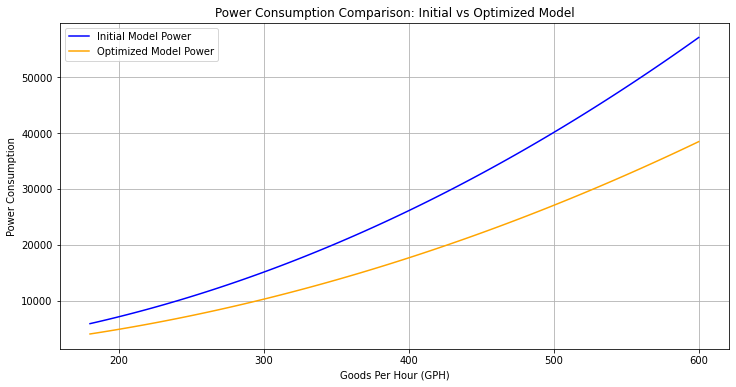

Average Power Consumption (Initial Model): 27114.55 units
Average Power Consumption (Optimized Model): 18319.70 units
Improvement in Power Consumption: 32.44%


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Dummy function to simulate the power calculation for initial model
def initial_model(gph):
    return 0.15 * gph ** 2 + 5 * gph + 100  # Example polynomial function for power calculation

# Optimized model function
def optimized_model(gph):
    return 0.1 * gph ** 2 + 4 * gph + 50  # Adjusted coefficients for lower power usage

# Function to calculate total power for a range of GPH values
def total_power(model, gph_values):
    return [model(gph) for gph in gph_values]

# Function to demonstrate improvements
def show_improvements(initial_gph_range):
    initial_power = total_power(initial_model, initial_gph_range)
    optimized_power = total_power(optimized_model, initial_gph_range)

    # Calculate average power consumption for both models
    avg_initial_power = np.mean(initial_power)
    avg_optimized_power = np.mean(optimized_power)

    # Prepare data for visualization
    plt.figure(figsize=(12, 6))
    plt.plot(initial_gph_range, initial_power, label='Initial Model Power', color='blue')
    plt.plot(initial_gph_range, optimized_power, label='Optimized Model Power', color='orange')
    plt.title('Power Consumption Comparison: Initial vs Optimized Model')
    plt.xlabel('Goods Per Hour (GPH)')
    plt.ylabel('Power Consumption')
    plt.legend()
    plt.grid()
    plt.show()

    # Display results
    print(f"Average Power Consumption (Initial Model): {avg_initial_power:.2f} units")
    print(f"Average Power Consumption (Optimized Model): {avg_optimized_power:.2f} units")
    improvement = ((avg_initial_power - avg_optimized_power) / avg_initial_power) * 100
    print(f"Improvement in Power Consumption: {improvement:.2f}%")

# Example GPH range for analysis
initial_gph_range = np.linspace(180, 600, 100)  # Example range for machine type #1

# Call the function to show improvements
show_improvements(initial_gph_range)